In [1]:
import numpy as np
import pandas as pd
from skbio.stats.composition import clr
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from debiasm.torch_functions import rescale
from scipy.stats import pointbiserialr

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black'
            }, 
       font_scale=2)
np.random.seed(0)

/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### description of experiment
- we generate a set of 50 positive and 50 negative samples
- samples w/ a positive `y` have 30 features drawn from a uniform distribution, and one that is empty
- samples w/ a negative `y` have 20 features drawn from a uniform distribution, and 11 empty features. 
- By construction, one feature is empty for all samples; question: will a clr transform introduce an association with `y` for that empty sample?
- We give all features an added pseudocount of $10^{-6}$, after which we rescale all samples to represent a relative abundance space
- Next, we run clr transfom using scipy.stats.composition's implementation

In [2]:
n_samples=100
frac_pos=.5
n_features_both = 20
n_features_pos = 10
n_features_empty = 1
pseudocount = 1e-5

n_pos = int( n_samples*frac_pos )
n_neg = n_samples-n_pos
# X = np.zeros((n_samples,
#              n_features_both + \
#              n_features_pos + \
#              n_features_empty
#              ))

X = np.hstack((
    np.vstack( ( np.random.uniform(size=( n_pos, n_features_both + n_features_pos )), 
            
                np.hstack(( np.random.uniform(size = ( n_neg, n_features_both )), 
                            np.zeros((n_neg, n_features_pos))
                          ) ))), 
    np.zeros((n_samples, n_features_empty)) 
        )) 


y = np.array([1]*n_pos + [0]*n_neg)


X_clr = clr(rescale( pseudocount + X ) )


p-value of transformed empty feature and outcome:

In [3]:
pointbiserialr(X_clr[:, -1], y)

PointbiserialrResult(correlation=-0.9949762275994378, pvalue=9.011121364712491e-100)

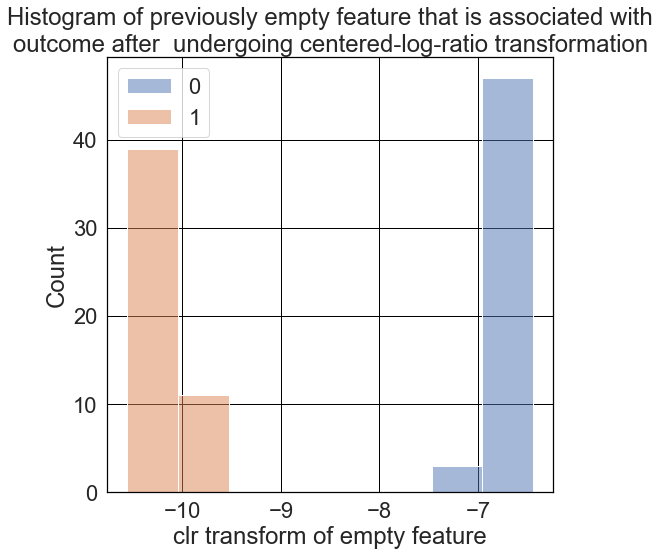

In [4]:
plt.figure(figsize=(8,8))
sns.histplot(x = X_clr[:, -1], 
             hue = y
             )
plt.title("Histogram of previously empty feature that is associated with\noutcome after  undergoing centered-log-ratio transformation"
         )
plt.xlabel('clr transform of empty feature')
plt.show()

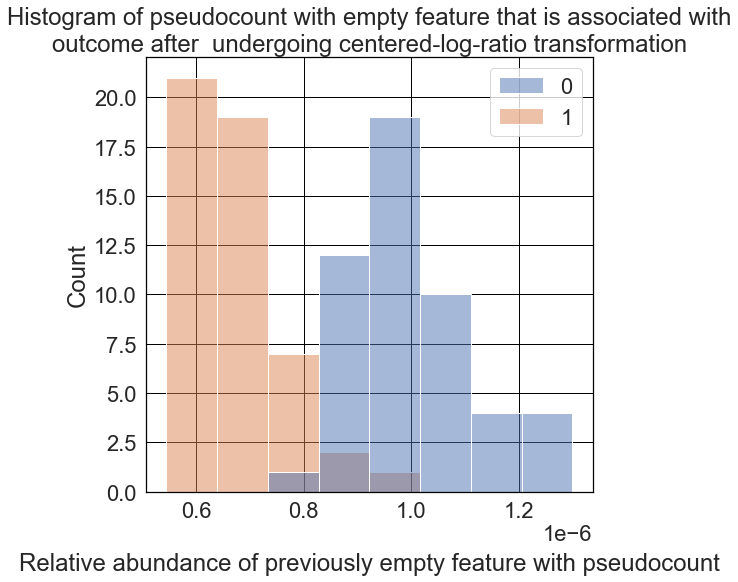

In [5]:
plt.figure(figsize=(8,8))
sns.histplot(x = rescale( pseudocount + X )[:, -1], 
             hue = y
             )
plt.title("Histogram of pseudocount with empty feature that is associated with\noutcome after  undergoing centered-log-ratio transformation"
         )
plt.xlabel('\nRelative abundance of previously empty feature with pseudocount')
plt.show()

Re-running the same analysis, but rescaling to relative abundance before adding in the pseudocount, so that the 'relative abundance of empty feature pseudocount' value (i.e. the previous plot) is the exact same for all samples

In [6]:
X_clr = clr( rescale( pseudocount + rescale(X) ).round(9) ) ## the second `rescale` is different

In [7]:
pointbiserialr(X_clr[:, -1], y)

PointbiserialrResult(correlation=-0.99649278842541, pvalue=2.1036342621755433e-107)

In [8]:
X_clr = clr( rescale( pseudocount + rescale(X) ) ) ## the second `rescale` is different

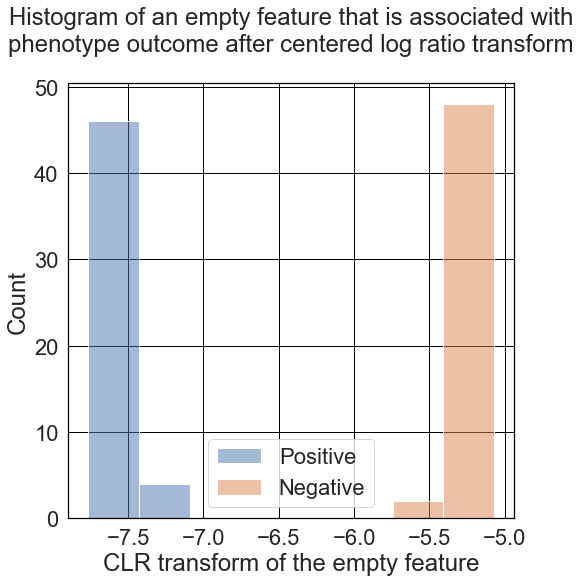

In [9]:
plt.figure(figsize=(8,8))
sns.histplot(x = X_clr[:, -1], 
             hue = ['Negative' if not i else 'Positive' for i in y]
             )
plt.title("Histogram of an empty feature that is associated with\n"+\
            "phenotype outcome after centered log ratio transform\n"
         )
plt.xlabel('CLR transform of the empty feature')
plt.show()

In [10]:
rescale( pseudocount + rescale(X) )[:, -1].round(9)

array([9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06,
       9.997e-06, 9.997e-06, 9.997e-06, 9.997e-06, 

In [11]:
from scipy.stats import mannwhitneyu
mannwhitneyu(X_clr[:, -1][y==0], 
             X_clr[:, -1][y==1]
             )

MannwhitneyuResult(statistic=0.0, pvalue=3.533035965194466e-18)

In [12]:
def geo_mean(iterable): # credit to stack overflow
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

In [13]:
X_rs = rescale( pseudocount + rescale(X) ).round(9)

In [14]:
X_clr[:, -1]

array([-7.61053068, -7.60543076, -7.52105452, -7.54186412, -7.66723733,
       -7.40423305, -7.60058156, -7.58752547, -7.53675971, -7.58393681,
       -7.48619847, -7.5728698 , -7.74298966, -7.30878188, -7.64360343,
       -7.65312462, -7.66057699, -7.4754041 , -7.48710135, -7.50105656,
       -7.66001862, -7.56679619, -7.612139  , -7.49004005, -7.45531536,
       -7.56972715, -7.57954388, -7.43264708, -7.57097061, -7.76305093,
       -7.54104233, -7.59602412, -7.6750604 , -7.37938518, -7.58837302,
       -7.18975818, -7.53780791, -7.48660626, -7.51926033, -7.66489984,
       -7.5789679 , -7.49515666, -7.55399906, -7.57087979, -7.52768414,
       -7.60238   , -7.57231261, -7.56933098, -7.72069906, -7.44199061,
       -5.38514807, -5.37386763, -5.34853036, -5.25929171, -5.31497239,
       -5.32795479, -5.16503817, -5.33182385, -5.36380816, -5.29859433,
       -5.21325712, -5.2642294 , -5.2778293 , -5.34842299, -5.34036236,
       -5.20596284, -5.38827997, -5.36722881, -5.33809826, -5.25

In [15]:
np.log(X_rs[:, -1] / np.array([geo_mean(a) for a in X_rs]) )

array([-7.61052108, -7.60542118, -7.52104494, -7.54185455, -7.66722774,
       -7.4042235 , -7.60057198, -7.58751589, -7.53675011, -7.58392721,
       -7.48618887, -7.57286022, -7.74298007, -7.3087723 , -7.64359385,
       -7.65311503, -7.66056741, -7.47539451, -7.48709184, -7.50104698,
       -7.66000903, -7.56678661, -7.61212941, -7.49003048, -7.45530583,
       -7.56971742, -7.57953429, -7.43263776, -7.57096105, -7.76304135,
       -7.54103273, -7.59601453, -7.67505081, -7.37937559, -7.58836343,
       -7.18974871, -7.53779833, -7.48659662, -7.51925075, -7.66489024,
       -7.57895832, -7.49514704, -7.55398948, -7.5708702 , -7.52767457,
       -7.60237041, -7.57230303, -7.5693214 , -7.72068947, -7.44198103,
       -5.38514167, -5.37386124, -5.34852396, -5.25928532, -5.314966  ,
       -5.3279484 , -5.16503203, -5.33181745, -5.36380177, -5.29858794,
       -5.21325072, -5.26422301, -5.27782291, -5.3484166 , -5.34035597,
       -5.20595647, -5.38827357, -5.36722242, -5.33809186, -5.25

In [16]:
pd.Series( ( np.array([geo_mean(a) for a in X_rs])[y==0] ) ).describe()

count    50.000000
mean      0.001998
std       0.000169
min       0.001590
25%       0.001878
50%       0.002048
75%       0.002140
max       0.002241
dtype: float64

In [17]:
pd.Series( ( np.array([geo_mean(a) for a in X_rs])[y==1] ) ).describe()

count    50.000000
mean      0.019176
std       0.001911
min       0.013254
25%       0.018014
50%       0.019391
75%       0.020069
max       0.023513
dtype: float64

In [18]:
mannwhitneyu( np.array([geo_mean(a) for a in X_rs])[y==0],
              np.array([geo_mean(a) for a in X_rs])[y==1] 
            )

MannwhitneyuResult(statistic=0.0, pvalue=3.533035965194466e-18)

In [19]:
pd.Series( ( X_clr[:, -1] )[y==0] ).describe()

count    50.000000
mean     -5.294081
std       0.087402
min      -5.412479
25%      -5.366374
50%      -5.322191
75%      -5.235773
max      -5.069429
dtype: float64

In [20]:
pd.Series( ( X_clr[:, -1] )[y==1] ).describe()

count    50.000000
mean     -7.554055
std       0.103615
min      -7.763051
25%      -7.604668
50%      -7.570303
75%      -7.496632
max      -7.189758
dtype: float64

In [21]:
np.log( np.power(10., -5) / 0.02 )

-7.600902459542082

In [22]:
np.log( np.power(10., -5) / 0.002 )

-5.298317366548036

In [23]:
pd.Series( rescale( pseudocount + rescale(X) )[:, -1] ).nunique()
## rounding to 9 because this step had some rounding errors...
## this is carried through in the clr analysis above

5

In [24]:
pd.Series( rescale( pseudocount + rescale(X) )[:, -1].round(9) ).nunique()
## rounding to 9 because this step had some rounding errors...
## this is carried through in the clr analysis above

## to have multiple unique values before clr would undermine our argument..

1